In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation


In [2]:
con = sqlite3.connect('/mydata/final.sqlite')
 

In [3]:
final = pd.read_sql_query(""" SELECT * FROM Reviews""", con)

In [4]:
final = final.sample(n = 2000)
final.shape

(2000, 12)

In [5]:
final = final.sort_values(by=['Time'])

In [6]:
l = final['Score']
final = final.drop("Score", axis = 1)

In [7]:
tf_idf_vect = TfidfVectorizer(ngram_range = (1,2))
final_tf_idf = tf_idf_vect.fit_transform(final['CleanedText'].values)


In [8]:
print("type = ", type(final_tf_idf))
print("shape = ", final_tf_idf.get_shape())
print("number of unique words ", final_tf_idf.get_shape()[1])

type =  <class 'scipy.sparse.csr.csr_matrix'>
shape =  (2000, 65735)
number of unique words  65735


In [9]:
from sklearn.preprocessing import StandardScaler


In [10]:
final_df = pd.DataFrame(final_tf_idf.toarray())

In [11]:
standardized_data = StandardScaler(with_mean = False).fit_transform(final_tf_idf)
                                                                    

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data, l, test_size=0.3, random_state=0)

In [15]:
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree', n_jobs = -1)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 3.


In [16]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree', n_jobs = -1)
knn_optimal.fit(X_train, y_train)
pred = knn_optimal.predict(X_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 3 is 82.000000%


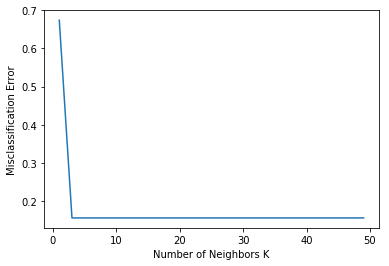

the misclassification error for each k value is :  [0.674 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156
 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156
 0.156]


In [19]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))